In [44]:
import os
import numpy as np

np.random.seed(42)

In [45]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "pokemon_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [46]:
POKEMON_PATH = os.path.join("datasets", "pokemon")

In [47]:
import pandas as pd

def load_pokemon_data(pokemon_path=POKEMON_PATH):
    csv_path = os.path.join(pokemon_path, "pokemon.csv")
    return pd.read_csv(csv_path)

In [48]:
pokemon = load_pokemon_data()
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [49]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [50]:
pokemon["Legendary"].value_counts()

Legendary
False    735
True      65
Name: count, dtype: int64

In [51]:
pokemon.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


Saving figure attribute_histogram_plots


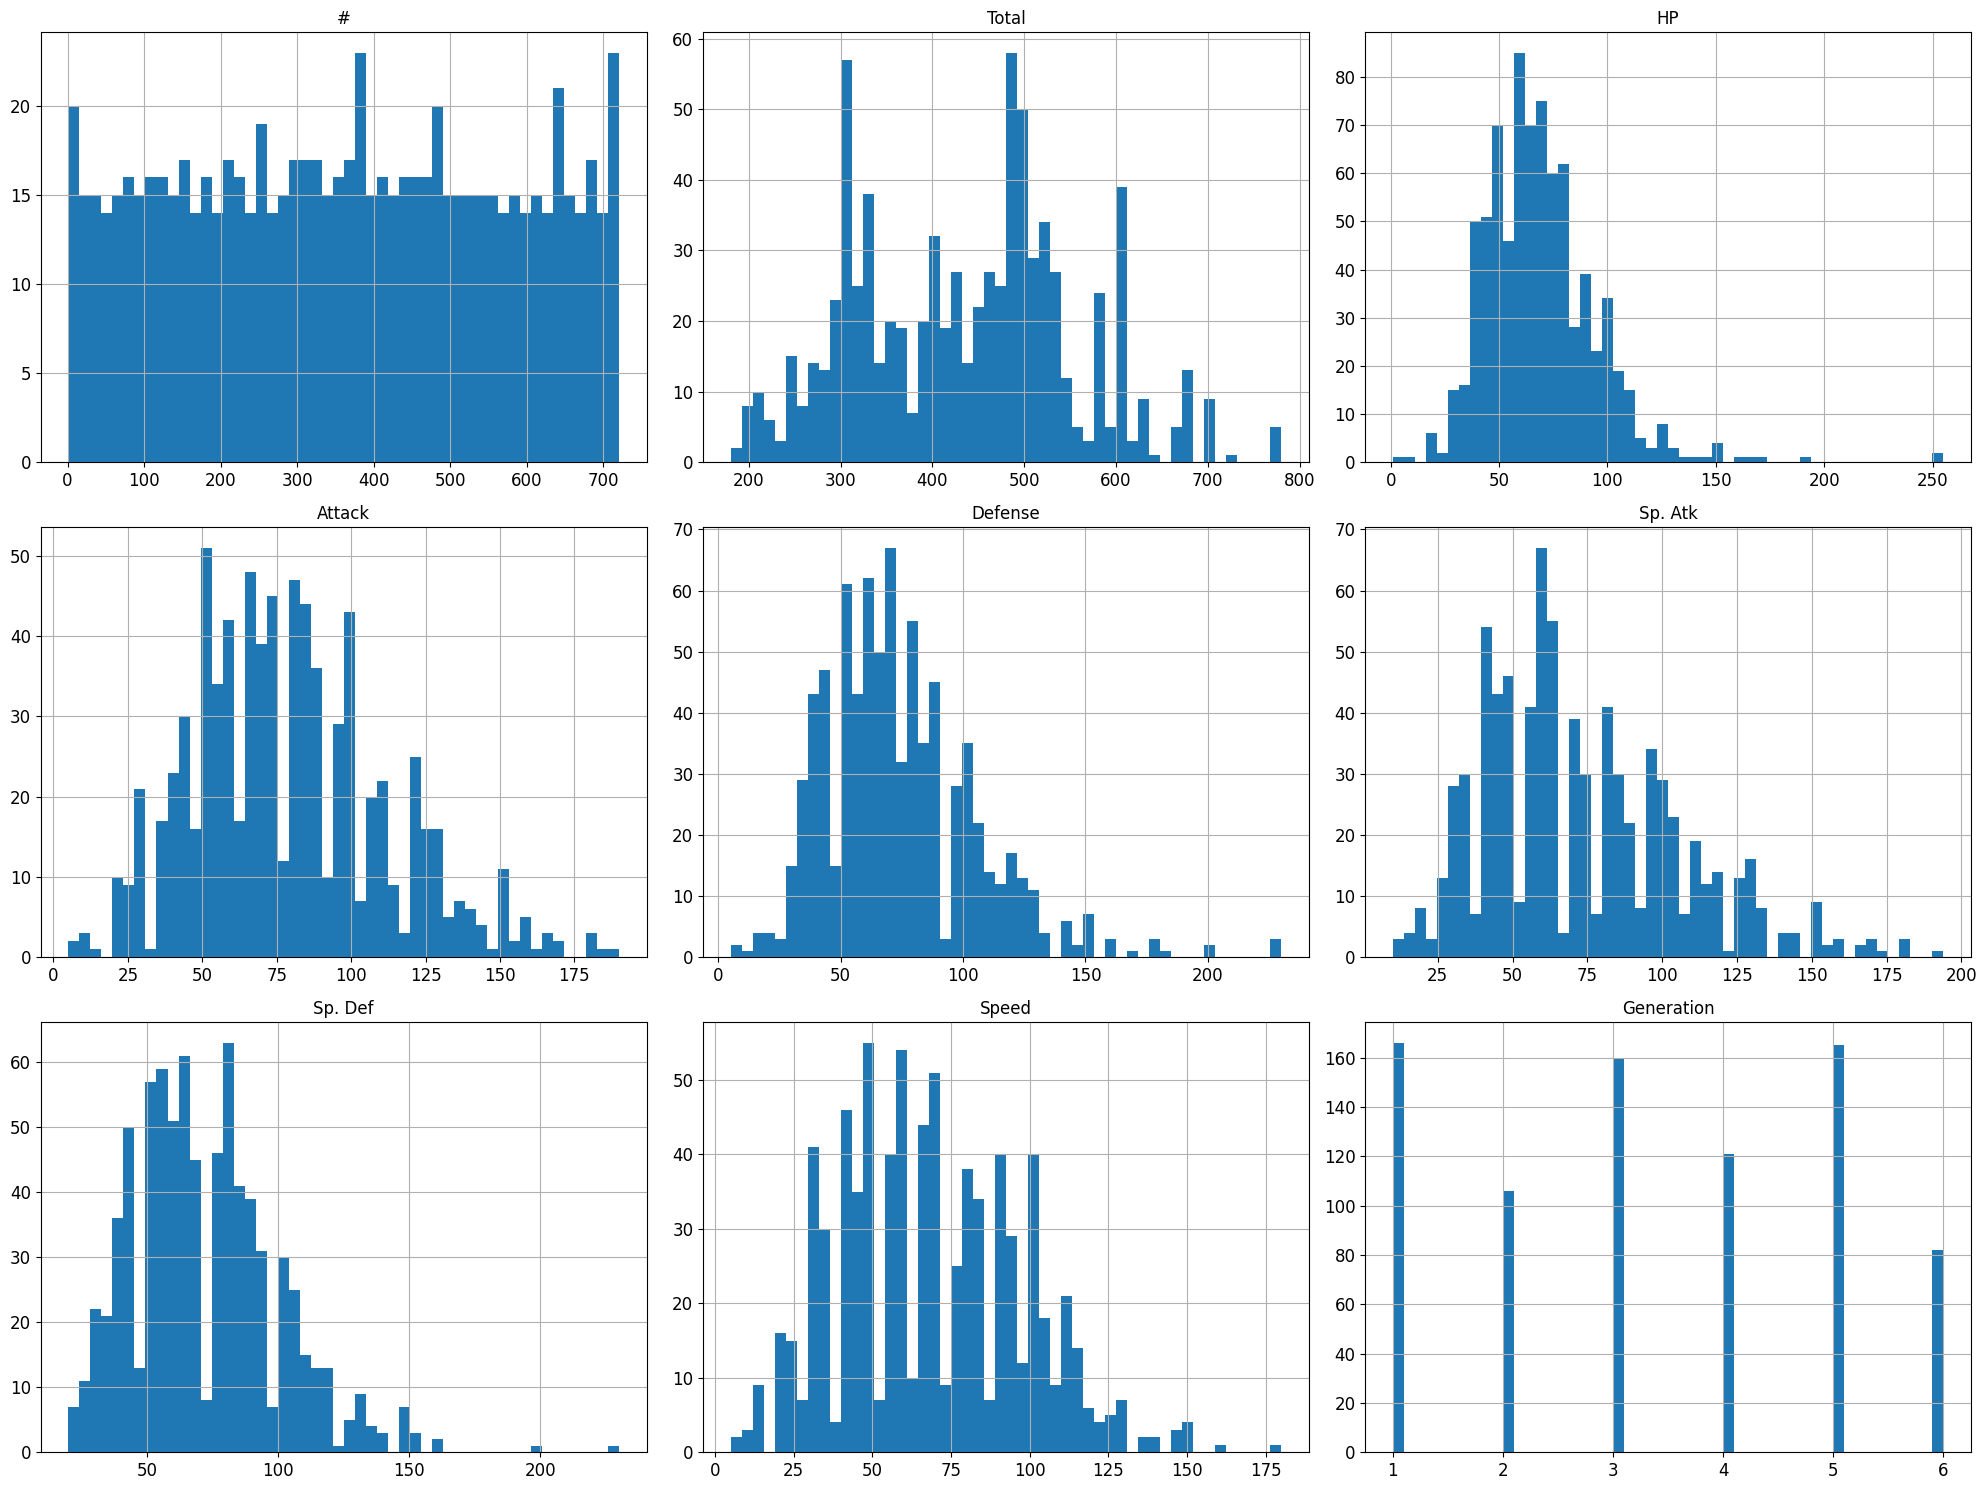

In [52]:
import matplotlib.pyplot as plt

pokemon.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

In [53]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [54]:
train_set, test_set = split_train_test(pokemon, 0.2)

In [55]:
print(len(train_set))
print(len(test_set))

640
160


In [56]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(pokemon, test_size=0.2, random_state=42)

In [57]:
print(len(train_set))
print(len(test_set))

640
160


<Axes: >

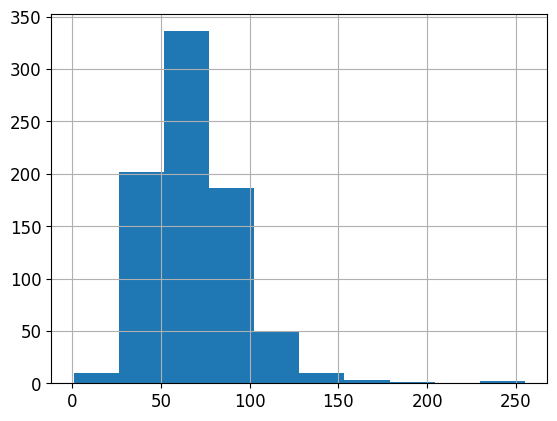

In [58]:
pokemon["HP"].hist()

In [59]:
pokemon["hp_cat"] = pd.cut(pokemon["HP"],
                           bins=[0., 50, 100, 150, np.inf],
                           labels=[1, 2, 3, 4])

In [60]:
pokemon["hp_cat"].value_counts()

hp_cat
2    522
1    211
3     61
4      6
Name: count, dtype: int64

<Axes: >

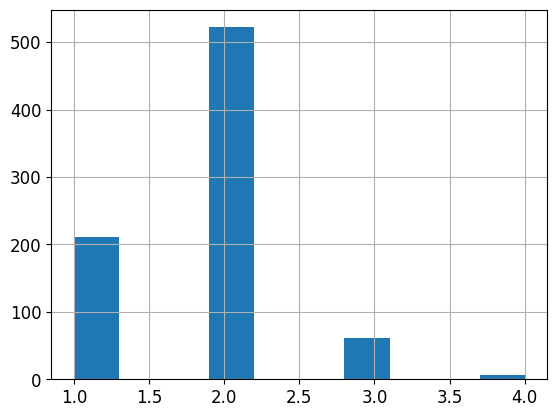

In [61]:
pokemon["hp_cat"].hist()

In [62]:
pokemon.sort_values("HP", ascending=False)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,hp_cat
261,242,Blissey,Normal,NaN,540,255,10,10,75,135,55,2,False,4
121,113,Chansey,Normal,NaN,450,250,5,5,35,105,50,1,False,4
217,202,Wobbuffet,Psychic,NaN,405,190,33,58,33,58,33,2,False,4
351,321,Wailord,Water,NaN,500,170,90,45,90,45,60,3,False,4
655,594,Alomomola,Water,NaN,470,165,75,80,40,45,65,5,False,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,129,Magikarp,Water,NaN,200,20,10,55,15,20,80,1,False,1
381,349,Feebas,Water,NaN,200,20,15,20,10,55,80,3,False,1
388,355,Duskull,Ghost,NaN,295,20,40,90,30,90,25,3,False,1
55,50,Diglett,Ground,NaN,265,10,55,25,35,45,95,1,False,1


In [64]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(pokemon, pokemon["hp_cat"]):
    strat_train_set = pokemon.loc[train_index]
    strat_test_set = pokemon.loc[test_index]

In [65]:
strat_test_set["hp_cat"].value_counts() / len(strat_test_set)

hp_cat
2    0.65625
1    0.26250
3    0.07500
4    0.00625
Name: count, dtype: float64

In [67]:
pokemon["hp_cat"].value_counts() / len(pokemon)

hp_cat
2    0.65250
1    0.26375
3    0.07625
4    0.00750
Name: count, dtype: float64

In [69]:
def hp_cat_proportions(data):
    return data["hp_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(pokemon, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": hp_cat_proportions(pokemon),
    "Stratified": hp_cat_proportions(strat_test_set),
    "Random": hp_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [70]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
hp_cat,,,,,
1,0.26375,0.26250,0.25625,-2.843602,-0.473934
2,0.65250,0.65625,0.65625,0.574713,0.574713
3,0.07625,0.07500,0.07500,-1.639344,-1.639344
4,0.00750,0.00625,0.01250,66.666667,-16.666667


In [71]:
for set_ in(strat_train_set, strat_test_set):
    set_.drop("hp_cat", axis=1, inplace=True)

In [72]:
pokemon = strat_train_set.copy()

Saving figure bad_visualization_plot


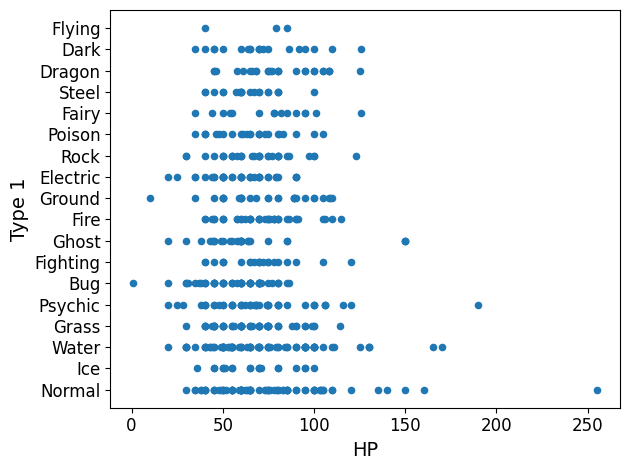

In [97]:
pokemon.plot(kind="scatter", x="HP", y="Type 1")
save_fig("bad_visualization_plot")

Saving figure better_visualization_plot


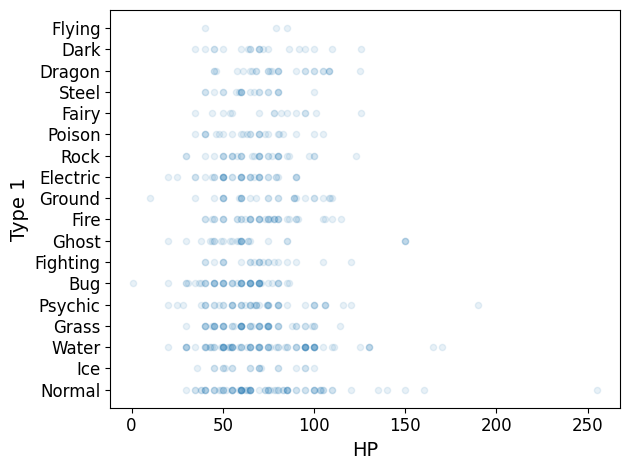

In [96]:
pokemon.plot(kind="scatter", x="HP", y="Type 1", alpha=0.1)
save_fig("better_visualization_plot")

Saving figure scatterplot_visualization


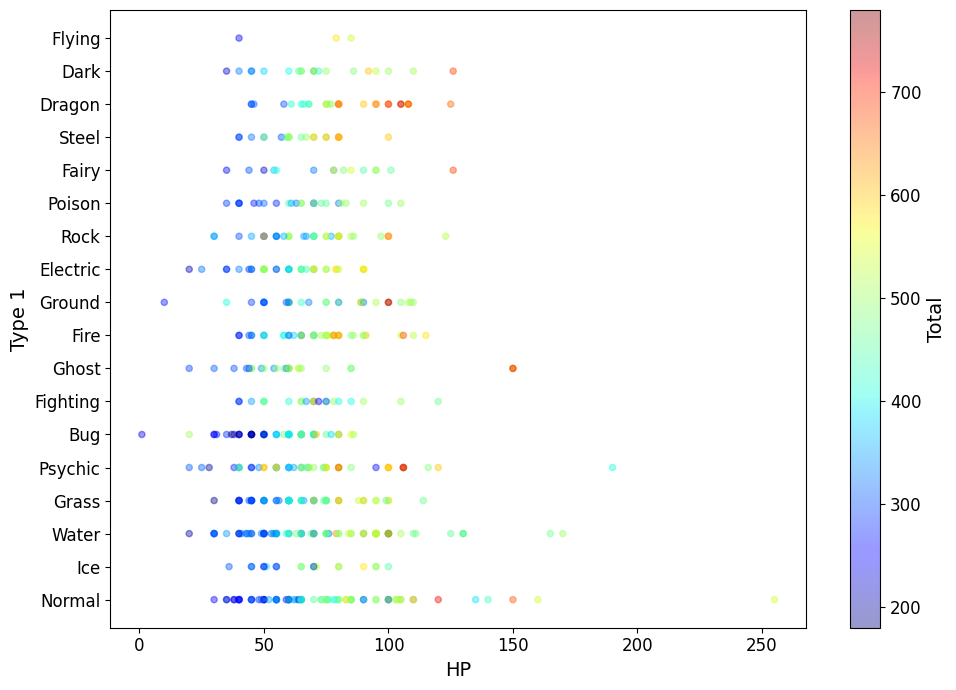

In [95]:
pokemon.plot(kind="scatter", x="HP", y="Type 1", alpha=0.4, figsize=(10,7),
            c="Total", cmap=plt.get_cmap("jet"), colorbar=True,
            sharex=False)
save_fig("scatterplot_visualization")

In [102]:
columns_to_drop = ['Name', 'Type 1', 'Type 2', 'Legendary']
pokemon_without_string_columns = pokemon.drop(columns=columns_to_drop)
corr_matrix = pokemon_without_string_columns.corr()

In [108]:
corr_matrix["HP"].sort_values(ascending=False)

HP            1.000000
Total         0.640939
Attack        0.437369
Sp. Def       0.402215
Sp. Atk       0.372786
Defense       0.281976
Speed         0.186938
#             0.109647
Generation    0.071167
Name: HP, dtype: float64

In [104]:
print(pokemon)

       #                   Name   Type 1    Type 2  Total   HP  Attack   
475  428                Lopunny   Normal       NaN    480   65      76  \
643  582              Vanillite      Ice       NaN    305   36      50   
281  259              Marshtomp    Water    Ground    405   70      85   
49    44                  Gloom    Grass    Poison    395   60      65   
586  527                 Woobat  Psychic    Flying    313   55      45   
..   ...                    ...      ...       ...    ...  ...     ...   
15    12             Butterfree      Bug    Flying    395   60      45   
672  611                Fraxure   Dragon       NaN    410   66     117   
67    62              Poliwrath    Water  Fighting    510   90      95   
494  445  GarchompMega Garchomp   Dragon    Ground    700  108     170   
23    18    PidgeotMega Pidgeot   Normal    Flying    579   83      80   

     Defense  Sp. Atk  Sp. Def  Speed  Generation  Legendary  
475       84       54       96    105           

array([[<Axes: xlabel='HP', ylabel='HP'>,
        <Axes: xlabel='Total', ylabel='HP'>,
        <Axes: xlabel='Attack', ylabel='HP'>,
        <Axes: xlabel='Sp. Def', ylabel='HP'>],
       [<Axes: xlabel='HP', ylabel='Total'>,
        <Axes: xlabel='Total', ylabel='Total'>,
        <Axes: xlabel='Attack', ylabel='Total'>,
        <Axes: xlabel='Sp. Def', ylabel='Total'>],
       [<Axes: xlabel='HP', ylabel='Attack'>,
        <Axes: xlabel='Total', ylabel='Attack'>,
        <Axes: xlabel='Attack', ylabel='Attack'>,
        <Axes: xlabel='Sp. Def', ylabel='Attack'>],
       [<Axes: xlabel='HP', ylabel='Sp. Def'>,
        <Axes: xlabel='Total', ylabel='Sp. Def'>,
        <Axes: xlabel='Attack', ylabel='Sp. Def'>,
        <Axes: xlabel='Sp. Def', ylabel='Sp. Def'>]], dtype=object)

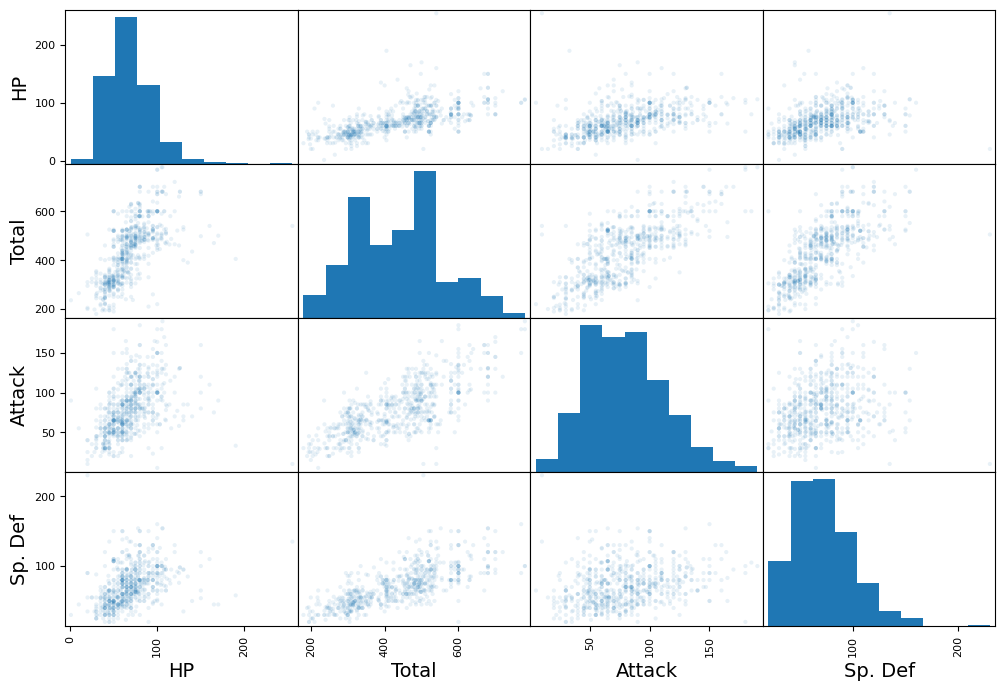

In [109]:
from pandas.plotting import scatter_matrix

attributes = ["HP", 
              "Total", 
              "Attack", 
              "Sp. Def"]
scatter_matrix(pokemon[attributes], figsize=(12, 8), alpha=0.1)

<Axes: xlabel='HP', ylabel='Total'>

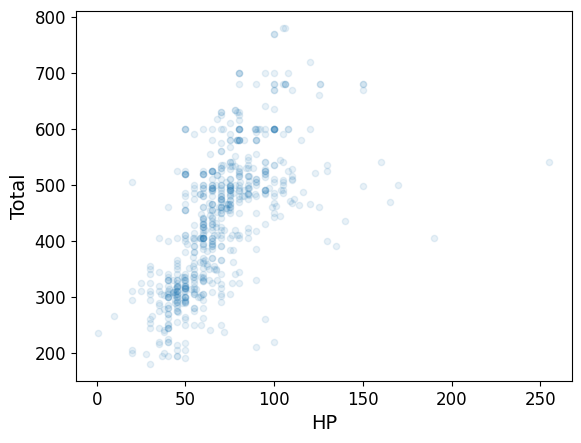

In [111]:
pokemon.plot(kind="scatter", 
             x="HP", 
             y="Total", 
             alpha=0.1)

In [112]:
pokemon = strat_train_set.drop("Total", axis=1)
pokemon_labels = strat_train_set["Total"].copy()

print(pokemon)
print(pokemon_labels)

       #                   Name   Type 1    Type 2   HP  Attack  Defense   
475  428                Lopunny   Normal       NaN   65      76       84  \
643  582              Vanillite      Ice       NaN   36      50       50   
281  259              Marshtomp    Water    Ground   70      85       70   
49    44                  Gloom    Grass    Poison   60      65       70   
586  527                 Woobat  Psychic    Flying   55      45       43   
..   ...                    ...      ...       ...  ...     ...      ...   
15    12             Butterfree      Bug    Flying   60      45       50   
672  611                Fraxure   Dragon       NaN   66     117       70   
67    62              Poliwrath    Water  Fighting   90      95       95   
494  445  GarchompMega Garchomp   Dragon    Ground  108     170      115   
23    18    PidgeotMega Pidgeot   Normal    Flying   83      80       80   

     Sp. Atk  Sp. Def  Speed  Generation  Legendary  
475       54       96    105     

In [114]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [115]:
pokemon_num = pokemon.drop(columns_to_drop, axis=1)
imputer.fit(pokemon_num)

SimpleImputer(strategy='median')

In [116]:
imputer.statistics_

array([356.,  65.,  75.,  70.,  65.,  70.,  65.,   3.])

In [117]:
pokemon_num.median().values

array([356.,  65.,  75.,  70.,  65.,  70.,  65.,   3.])

In [118]:
X = imputer.transform(pokemon_num)

In [119]:
pokemon_tr = pd.DataFrame(X, columns=pokemon_num.columns, index=pokemon_num.index)

In [120]:
print(pokemon_tr)

         #     HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  Generation
475  428.0   65.0    76.0     84.0     54.0     96.0  105.0         4.0
643  582.0   36.0    50.0     50.0     65.0     60.0   44.0         5.0
281  259.0   70.0    85.0     70.0     60.0     70.0   50.0         3.0
49    44.0   60.0    65.0     70.0     85.0     75.0   40.0         1.0
586  527.0   55.0    45.0     43.0     55.0     43.0   72.0         5.0
..     ...    ...     ...      ...      ...      ...    ...         ...
15    12.0   60.0    45.0     50.0     90.0     80.0   70.0         1.0
672  611.0   66.0   117.0     70.0     40.0     50.0   67.0         5.0
67    62.0   90.0    95.0     95.0     70.0     90.0   70.0         1.0
494  445.0  108.0   170.0    115.0    120.0     95.0   92.0         4.0
23    18.0   83.0    80.0     80.0    135.0     80.0  121.0         1.0

[640 rows x 8 columns]


In [122]:
pokemon_cat = pokemon[columns_to_drop]
pokemon_cat.head(10)

,Name,Type 1,Type 2,Legendary
475,Lopunny,Normal,NaN,False
643,Vanillite,Ice,NaN,False
281,Marshtomp,Water,Ground,False
49,Gloom,Grass,Poison,False
586,Woobat,Psychic,Flying,False
734,Vivillon,Bug,Flying,False
141,GyaradosMega Gyarados,Water,Dark,False
62,Primeape,Fighting,NaN,False
243,Delibird,Ice,Flying,False
669,Lampent,Ghost,Fire,False
